In [10]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [11]:
iris = load_iris()
X = iris.data
y = iris.target

In [12]:
def initialize_weights(num_samples):

    weights = np.ones(num_samples) / num_samples
#     print(f"weights {weights}")
    return weights

In [13]:
def calculate_error(y_true, y_pred, weights):
    
    error =  np.sum(weights * (y_pred != y_true))
#     print(f"Error {error} ")
    return error

In [14]:
def update_weights(weights, alpha, y_true, y_pred):
    
    updated_weights = weights * np.exp(-alpha * y_true * y_pred)
    new_weights = updated_weights / np.sum(updated_weights) #normalize the weights
#     print(f"New Weights {new_weights}")

    return new_weights

In [15]:
def adaboost(X, y, num_iterations):
    
    n_samples, n_features = X.shape
    weights = initialize_weights(n_samples)
    models = []
    alphas = []
    errors = []

    for _ in range(num_iterations):
       
        model = DecisionTreeClassifier(max_depth=1) # Decision stumps 
        model.fit(X, y, sample_weight=weights)

     
        y_pred = model.predict(X)

    
        error = calculate_error(y, y_pred, weights)
        print(f"Epoch {_+1} )
        errors.append(error)

        alpha = 0.5 * np.log((1 - error) / (error + 1e-10))
        alphas.append(alpha)


        weights = update_weights(weights, alpha, y, y_pred)

        models.append(model)

    return models, alphas, errors


In [16]:

def adaboost_predict(models, alphas, X):
    
    predictions = np.zeros(len(X))
    for model, alpha in zip(models, alphas):
        predictions += alpha * model.predict(X)
    return np.sign(predictions)



In [17]:

# # Convert labels to binary (-1 and 1)
# y[y == 0] = -1

# Train Adaboost
num_iterations = 50
models, alphas,errors  = adaboost(X, y, num_iterations)

# Make predictions
y_pred = adaboost_predict(models, alphas, X)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print("Accuracy:", np.ceil( accuracy *100))

Accuracy: 67.0


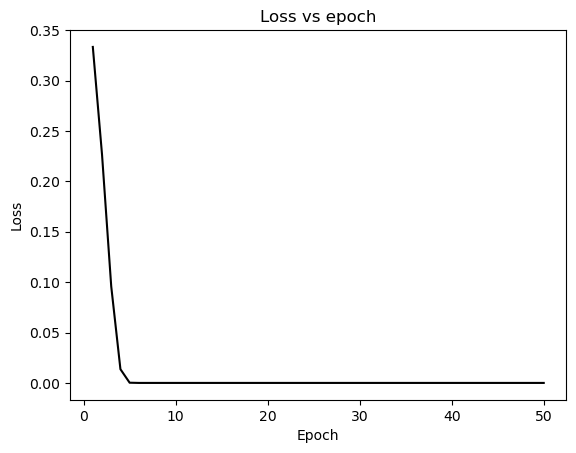

In [18]:
plt.plot(list(range(1,num_iterations+1)), errors, color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs epoch')
plt.show()